In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, adfuller

In [4]:
df_passengers = pd.read_csv('passengers.csv')

In [5]:
df_passengers['Month'] = pd.to_datetime(df_passengers['Month'])
df_passengers.set_index('Month', inplace=True)
df_passengers.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [6]:
df_passengers.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
# Функция для ручного расчета ACF
def manual_acf(series, max_lag=50):
    n = len(series)
    mean_val = series.mean()
    var_val = series.var()
    
    acf_values = []
    lags = list(range(0, max_lag + 1))
    
    for lag in lags:
        if lag == 0:
            acf_values.append(1.0) 
        else:
            # Создаем сдвинутые версии ряда
            series_lag = series.iloc[lag:].reset_index(drop=True)
            series_orig = series.iloc[:n-lag].reset_index(drop=True)
        
            covariance = ((series_orig - mean_val) * (series_lag - mean_val)).sum() / (n - 1)
            
            autocorr = covariance / var_val
            acf_values.append(autocorr)
    
    return lags, acf_values


In [8]:
max_lag = 50
lags, acf_values_manual = manual_acf(df_passengers['Passengers'], max_lag=max_lag)


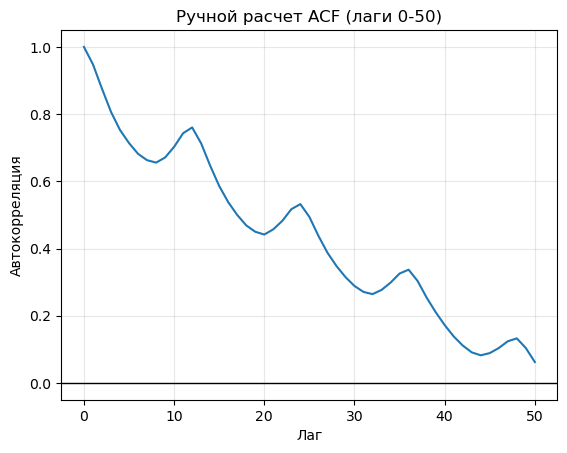

In [9]:
# Ручной ACF
plt.plot(lags, acf_values_manual)
plt.axhline(y=0, color='black', linewidth=1)
plt.title(f'Ручной расчет ACF (лаги 0-{max_lag})')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.grid(True, alpha=0.3)

Text(0, 0.5, 'Автокорреляция')

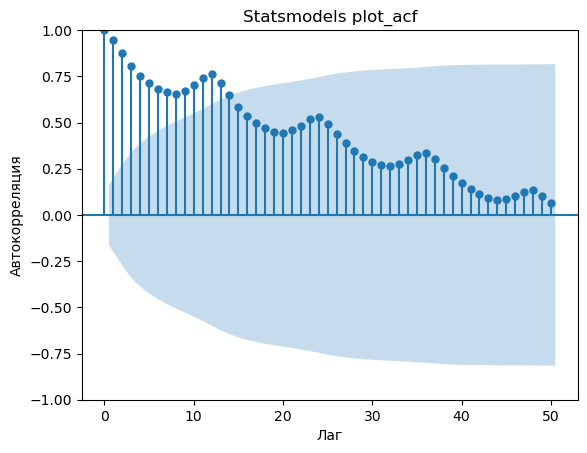

In [10]:
plot_acf(df_passengers['Passengers'], lags=max_lag)
plt.title('Statsmodels plot_acf')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')

In [11]:
df_births = pd.read_csv('births.csv')

In [12]:
df_births.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [13]:
df_births['Date'] = pd.to_datetime(df_births['Date'])
df_births.set_index('Date', inplace=True)

In [14]:
df_births.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [15]:
df_births.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [16]:
# Расчет ACF вручную для births
max_lag_births = 50
lags_births, acf_births_manual = manual_acf(df_births['Births'], max_lag=max_lag_births)

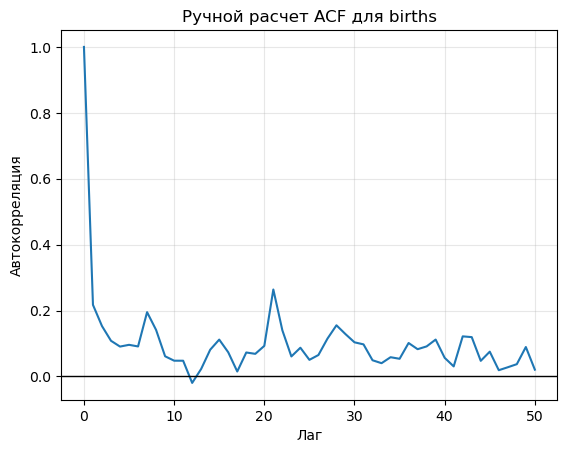

In [17]:
# Ручной ACF для births
plt.plot(lags_births, acf_births_manual)
plt.axhline(y=0, color='black', linewidth=1)
plt.title(f'Ручной расчет ACF для births')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.grid(True, alpha=0.3)

Text(0, 0.5, 'Автокорреляция')

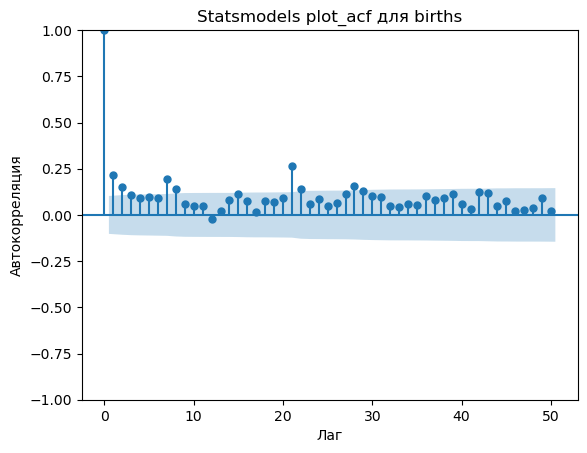

In [18]:
# Statsmodels ACF для births
plot_acf(df_births['Births'], lags=max_lag_births)
plt.title(f'Statsmodels plot_acf для births')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')

In [19]:
# Создание функции sin(x)
x = np.arange(0, 50, 0.1) 
sin_series = pd.Series(np.sin(x))
sin_series.index = x 
sin_series.head()

0.0    0.000000
0.1    0.099833
0.2    0.198669
0.3    0.295520
0.4    0.389418
dtype: float64

In [20]:
sin_series.describe()

count    500.000000
mean       0.000962
std        0.709550
min       -0.999990
25%       -0.705068
50%        0.012389
75%        0.712710
max        0.999994
dtype: float64

In [21]:
# Расчет ACF вручную для sin(x)
max_lag_sin = 100
lags_sin, acf_sin_manual = manual_acf(sin_series, max_lag=max_lag_sin)

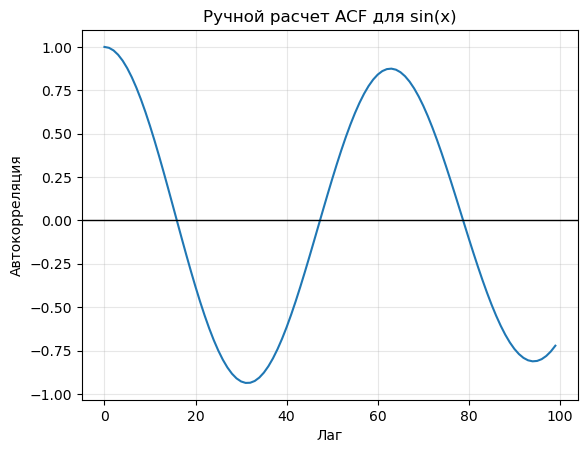

In [22]:
# Ручной ACF для sin(x)
plt.plot(lags_sin[:100], acf_sin_manual[:100])
plt.axhline(y=0, color='black', linewidth=1)
plt.title(f'Ручной расчет ACF для sin(x)')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.grid(True, alpha=0.3)

Text(0, 0.5, 'Автокорреляция')

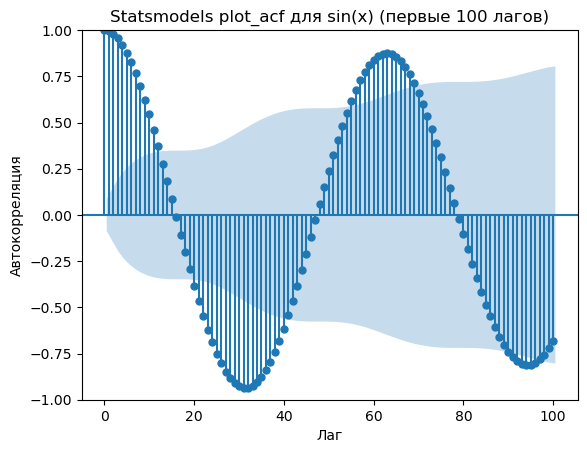

In [23]:
# Statsmodels ACF для sin(x)
plot_acf(sin_series, lags=100)
plt.title(f'Statsmodels plot_acf для sin(x) (первые 100 лагов)')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')


In [27]:
# тест Дики-Фуллера
adf_result = adfuller(df_births['Births'], autolag='AIC')
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

print(f"ADF статистика: {adf_statistic:.6f}")
print(f"p-value: {p_value:.6f}")
print(f"Критические значения:")
for key, value in critical_values.items():
    print(f"  {key}: {value:.6f}")

# Интерпретация
alpha = 0.05
print(f"\nУровень значимости α = {alpha}")
if p_value < alpha:
    print("p-value < α: Отвергаем H0 (ряд СТАЦИОНАРНЫЙ)")
else:
    print("p-value ≥ α: Не отвергаем H0 (ряд НЕСТАЦИОНАРНЫЙ)")

print(f"\nСравнение с критическими значениями:")
if adf_statistic < critical_values['1%']:
    print("ADF < 1%: Сильная уверенность в стационарности (99%)")
elif adf_statistic < critical_values['5%']:
    print("ADF < 5%: Средняя уверенность в стационарности (95%)")
elif adf_statistic < critical_values['10%']:
    print("ADF < 10%: Слабая уверенность в стационарности (90%)")
else:
    print("ADF > 10%: Нестационарный ряд")


ADF статистика: -4.808291
p-value: 0.000052
Критические значения:
  1%: -3.448749
  5%: -2.869647
  10%: -2.571089

Уровень значимости α = 0.05
p-value < α: Отвергаем H0 (ряд СТАЦИОНАРНЫЙ)

Сравнение с критическими значениями:
ADF < 1%: Сильная уверенность в стационарности (99%)


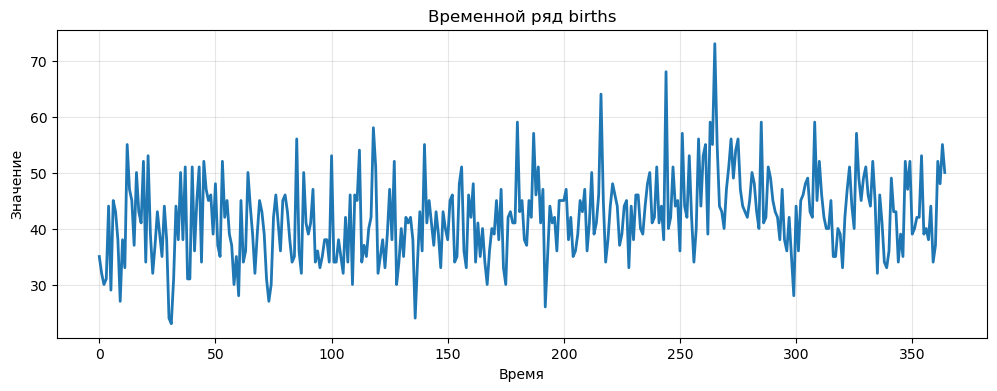

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(df_births['Births'].values, linewidth=2)
plt.title('Временной ряд births')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True, alpha=0.3)
plt.show()